In [1]:
# Importing pandas and other libraries for DataSet

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('powerplant.csv')

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking Data Types

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
# Checking Duplicate Values

In [8]:
df.duplicated().value_counts()

False    907
dtype: int64

In [9]:
# No duplicate vakue present

In [10]:
# Checking Null Values

In [11]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [12]:
# There Are so manu Null values are present

In [13]:
# Now Applying Label Encoder to convert object datatype into int

In [14]:
# Droping those columns which have more than 50% missing Data

In [15]:
df.drop(['estimated_generation_gwh','wepp_id','generation_gwh_2013','other_fuel1','other_fuel2','other_fuel3','generation_data_source','owner','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019'],axis=1,inplace=True)

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
list2=['latitude','longitude','commissioning_year','year_of_capacity_data']
si=SimpleImputer(strategy='mean')
for i in list2:
     df[i]=si.fit_transform(df[i].values.reshape(-1,1))

In [18]:
imp=SimpleImputer(strategy='most_frequent')
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))

In [19]:
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
dtype: int64

In [20]:
# Now No Null Values Are Present in our Data Set

In [21]:
# Now Applying Label Encoder on Those columns which are object datatype

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
list1=['country','country_long','name','gppd_idnr','primary_fuel','source','url','geolocation_source',]

In [25]:
for i in list1:
    df[i]=le.fit_transform(df[i])

In [26]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,0,0,0,657,2.5,28.1839,73.2407,6,2011.000000,109,128,1,2019.0
1,0,0,1,519,98.0,24.7663,74.6090,1,1997.091082,174,173,2,2019.0
2,0,0,2,853,39.2,21.9038,69.3732,7,1997.091082,21,205,2,2019.0
3,0,0,3,0,135.0,23.8712,91.3602,2,2004.000000,22,58,2,2019.0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2015.000000,22,58,2,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2016.000000,22,58,2,2019.0
903,0,0,903,822,3.0,12.8932,78.1654,6,1997.091082,77,22,0,2019.0
904,0,0,904,891,25.5,15.2758,75.5811,7,1997.091082,21,260,2,2019.0
905,0,0,905,539,80.0,24.3500,73.7477,1,1997.091082,59,82,2,2019.0


In [27]:
df.dtypes

country                    int32
country_long               int32
name                       int32
gppd_idnr                  int32
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel               int32
commissioning_year       float64
source                     int32
url                        int32
geolocation_source         int32
year_of_capacity_data    float64
dtype: object

In [28]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [29]:
df['capacity_mw'].nunique()

361

In [30]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [31]:
# So our data is now converted into numerical format

In [32]:
# Now importing libraries for some visualisation

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
m1=df.corr()['capacity_mw'].sort_values(ascending=False)
m1

capacity_mw              1.000000
commissioning_year       0.274292
geolocation_source       0.204865
longitude                0.195882
name                     0.060240
latitude                 0.050984
source                  -0.242122
url                     -0.243830
gppd_idnr               -0.335742
primary_fuel            -0.380395
country                       NaN
country_long                  NaN
year_of_capacity_data         NaN
Name: capacity_mw, dtype: float64

In [35]:
m2=df.corr()['primary_fuel'].sort_values(ascending=False)
m2

primary_fuel             1.000000
gppd_idnr                0.609180
url                      0.589886
source                   0.053613
name                     0.040753
latitude                -0.010204
commissioning_year      -0.126650
longitude               -0.347948
capacity_mw             -0.380395
geolocation_source      -0.483217
country                       NaN
country_long                  NaN
year_of_capacity_data         NaN
Name: primary_fuel, dtype: float64

In [36]:
# Since Few columns have no correlation with both the labels so dropping them

In [37]:
df.drop(['country','country_long','year_of_capacity_data'],axis=1,inplace=True)

In [38]:
df.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
name,1.000000,0.332205,0.060240,-0.135247,0.020279,0.040753,-0.043569,-0.014640,0.041917,0.036225
gppd_idnr,0.332205,1.000000,-0.335742,-0.105728,-0.377812,0.609180,0.044059,0.416384,0.597080,-0.464174
capacity_mw,0.060240,-0.335742,1.000000,0.050984,0.195882,-0.380395,0.274292,-0.242122,-0.243830,0.204865
latitude,-0.135247,-0.105728,0.050984,1.000000,0.036362,-0.010204,0.102069,0.055927,-0.131038,-0.184275
longitude,0.020279,-0.377812,0.195882,0.036362,1.000000,-0.347948,0.092331,-0.239333,-0.302985,0.252343
primary_fuel,0.040753,0.609180,-0.380395,-0.010204,-0.347948,1.000000,-0.126650,0.053613,0.589886,-0.483217
commissioning_year,-0.043569,0.044059,0.274292,0.102069,0.092331,-0.126650,1.000000,0.021528,0.010910,-0.007844
source,-0.014640,0.416384,-0.242122,0.055927,-0.239333,0.053613,0.021528,1.000000,0.160144,-0.505720
url,0.041917,0.597080,-0.243830,-0.131038,-0.302985,0.589886,0.010910,0.160144,1.000000,-0.018929
geolocation_source,0.036225,-0.464174,0.204865,-0.184275,0.252343,-0.483217,-0.007844,-0.505720,-0.018929,1.000000


In [39]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,1997.091082,43.847850,94.469680,1.733186
std,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,13.016360,44.642818,70.381222,0.677151
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000
25%,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,1997.091082,22.000000,58.000000,2.000000
50%,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,1997.091082,22.000000,58.000000,2.000000
75%,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,2003.000000,29.500000,115.500000,2.000000
max,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,303.000000,2.000000


<AxesSubplot:>

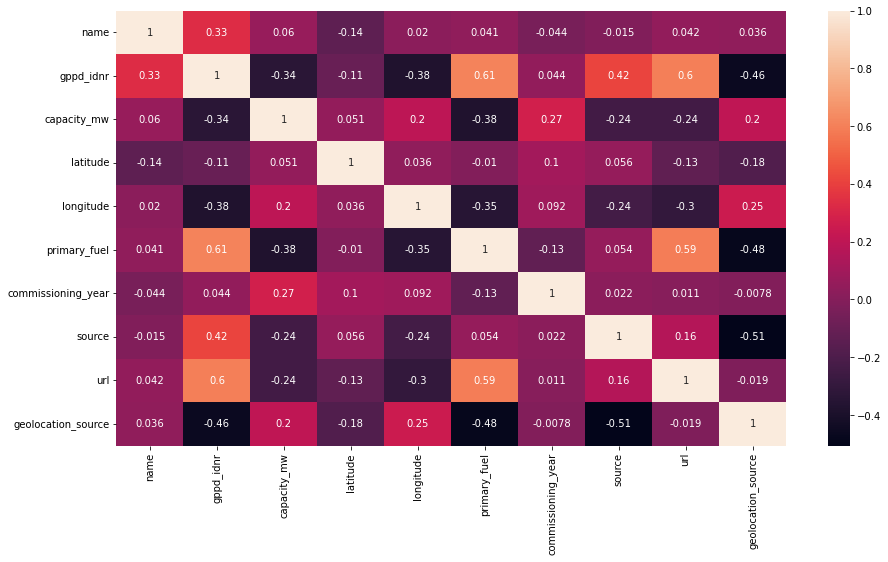

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [42]:
# Univariate Analysis

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

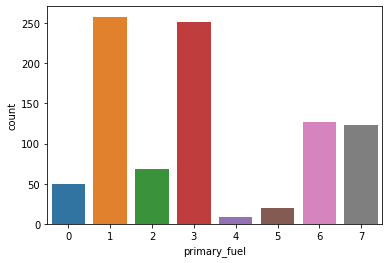

In [43]:
sns.countplot(df['primary_fuel'])

In [44]:
# It clearly shows that balancing is required

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

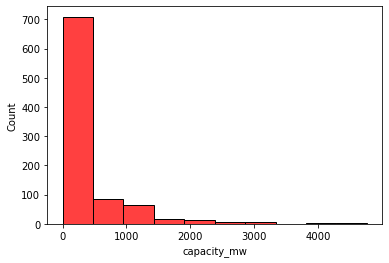

In [45]:
sns.histplot(df['capacity_mw'],bins=10,color='r')

<AxesSubplot:xlabel='primary_fuel', ylabel='Count'>

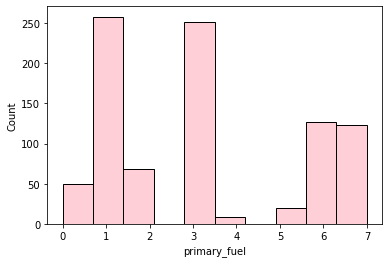

In [46]:
sns.histplot(df['primary_fuel'],bins=10,color='pink')

<AxesSubplot:xlabel='latitude', ylabel='Count'>

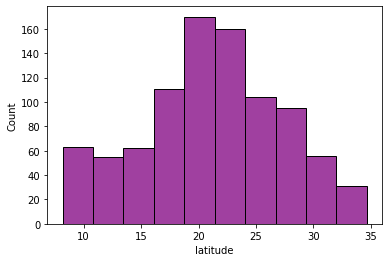

In [47]:
sns.histplot(df['latitude'],bins=10,color='purple')

<AxesSubplot:xlabel='longitude', ylabel='Count'>

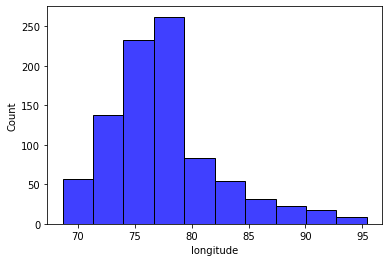

In [49]:
sns.histplot(df['longitude'],bins=10,color='b')

<AxesSubplot:xlabel='longitude', ylabel='Count'>

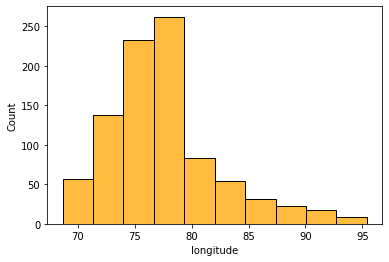

In [50]:
sns.histplot(df['longitude'],bins=10,color='orange')

In [51]:
# Now Checking if our Data set is normally distributed or not

<AxesSubplot:xlabel='gppd_idnr', ylabel='Count'>

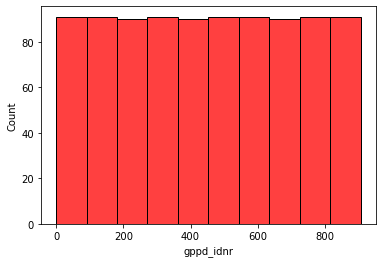

In [54]:
sns.histplot(df['gppd_idnr'],bins=10,color='red')

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

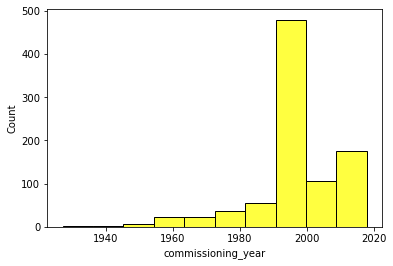

In [55]:
sns.histplot(df['commissioning_year'],bins=10,color='yellow')

<AxesSubplot:xlabel='source', ylabel='Count'>

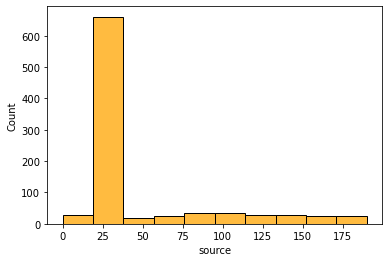

In [56]:
sns.histplot(df['source'],bins=10,color='orange')

<AxesSubplot:xlabel='url', ylabel='Count'>

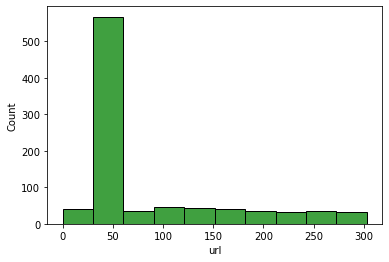

In [57]:
sns.histplot(df['url'],bins=10,color='green')

<AxesSubplot:xlabel='geolocation_source', ylabel='Count'>

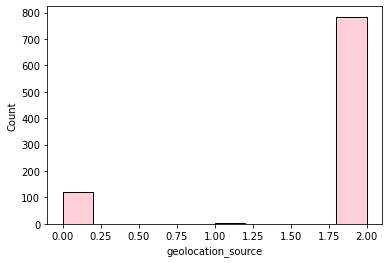

In [58]:
sns.histplot(df['geolocation_source'],bins=10,color='pink')

In [59]:
# Now Doing some bivariate Analysis

<AxesSubplot:xlabel='source', ylabel='primary_fuel'>

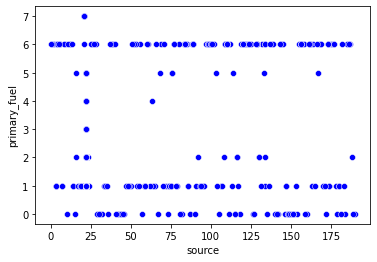

In [61]:
sns.scatterplot(x=df['source'],y=df['primary_fuel'],color='blue')

<AxesSubplot:xlabel='url', ylabel='primary_fuel'>

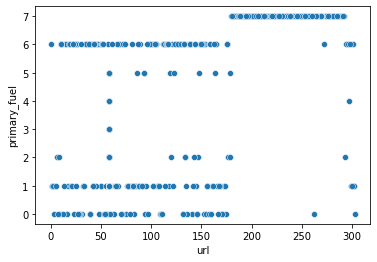

In [539]:
sns.scatterplot(x=df['url'],y=df['primary_fuel'])

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

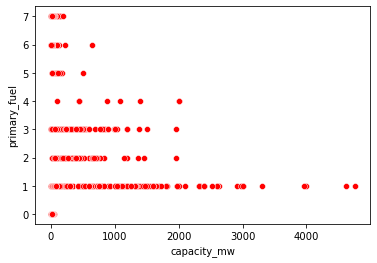

In [62]:
sns.scatterplot(x=df['capacity_mw'],y=df['primary_fuel'],color='r')

<AxesSubplot:xlabel='latitude', ylabel='primary_fuel'>

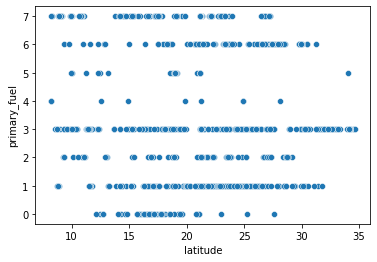

In [63]:
sns.scatterplot(x=df['latitude'],y=df['primary_fuel'])

<AxesSubplot:xlabel='longitude', ylabel='primary_fuel'>

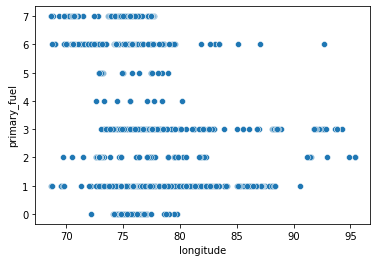

In [64]:
sns.scatterplot(x=df['longitude'],y=df['primary_fuel'])

<AxesSubplot:xlabel='geolocation_source', ylabel='primary_fuel'>

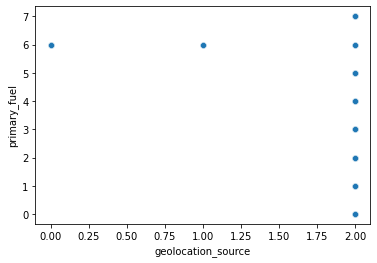

In [65]:
sns.scatterplot(x=df['geolocation_source'],y=df['primary_fuel'])

<AxesSubplot:xlabel='name', ylabel='primary_fuel'>

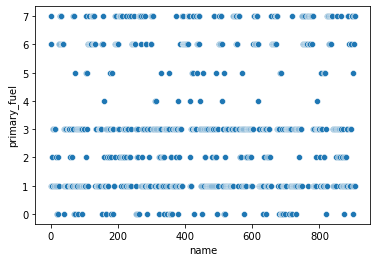

In [66]:
sns.scatterplot(x=df['name'],y=df['primary_fuel'])

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

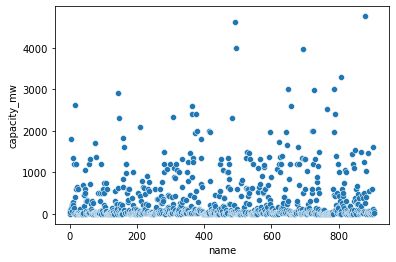

In [67]:
sns.scatterplot(x=df['name'],y=df['capacity_mw'])

<AxesSubplot:xlabel='source', ylabel='capacity_mw'>

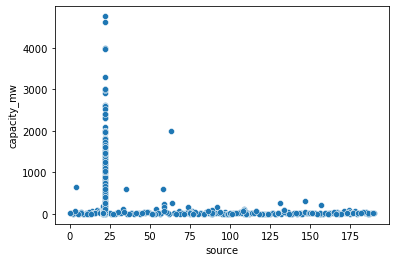

In [68]:
sns.scatterplot(x=df['source'],y=df['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

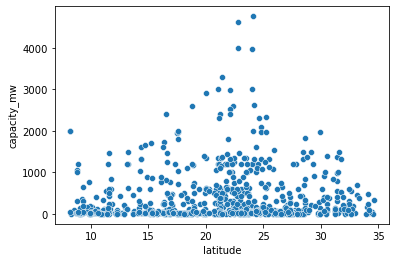

In [69]:
sns.scatterplot(x=df['latitude'],y=df['capacity_mw'])

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

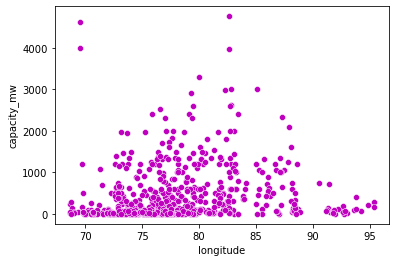

In [75]:
sns.scatterplot(x=df['longitude'],y=df['capacity_mw'],color='m')

<AxesSubplot:xlabel='url', ylabel='capacity_mw'>

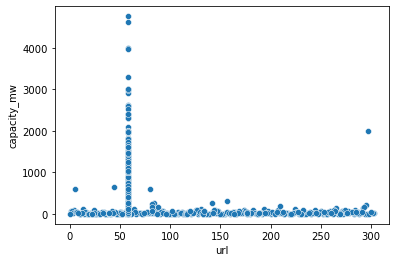

In [71]:
sns.scatterplot(x=df['url'],y=df['capacity_mw'])

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

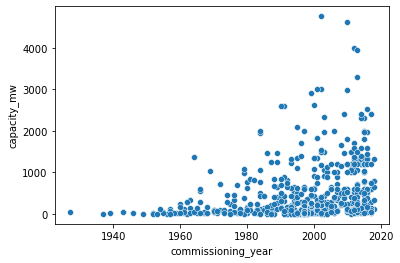

In [72]:
sns.scatterplot(x=df['commissioning_year'],y=df['capacity_mw'])

In [73]:
# Now Check the distribution of all columns if they are normally distributed or not

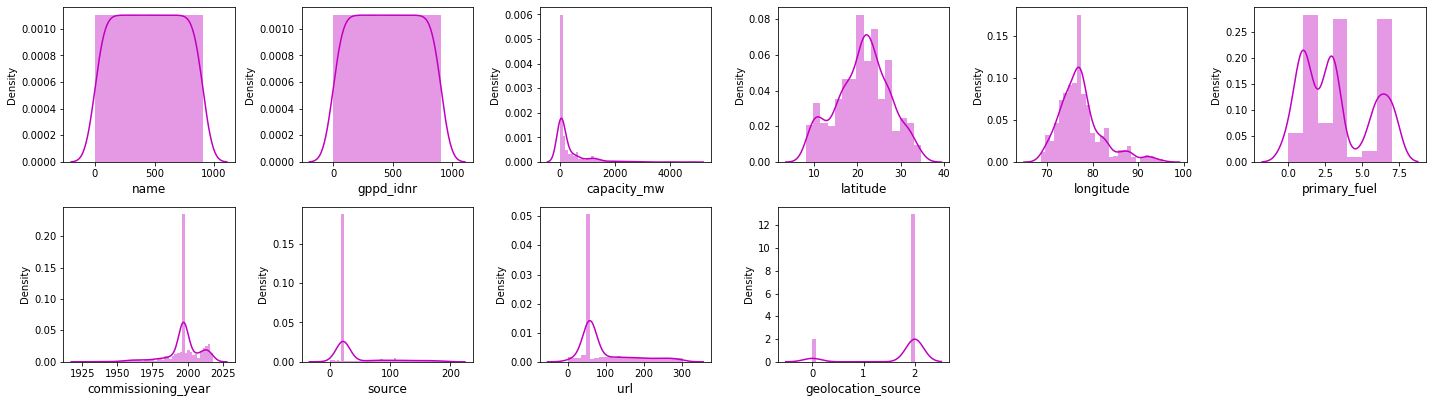

In [76]:
plt.figure(figsize=(20,8),facecolor="White")
plotnumber=1
for i in df.columns:
    if plotnumber<=14:
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [77]:
# From the above visualisation it is clear that they are not Normally Distributed and skewness is present

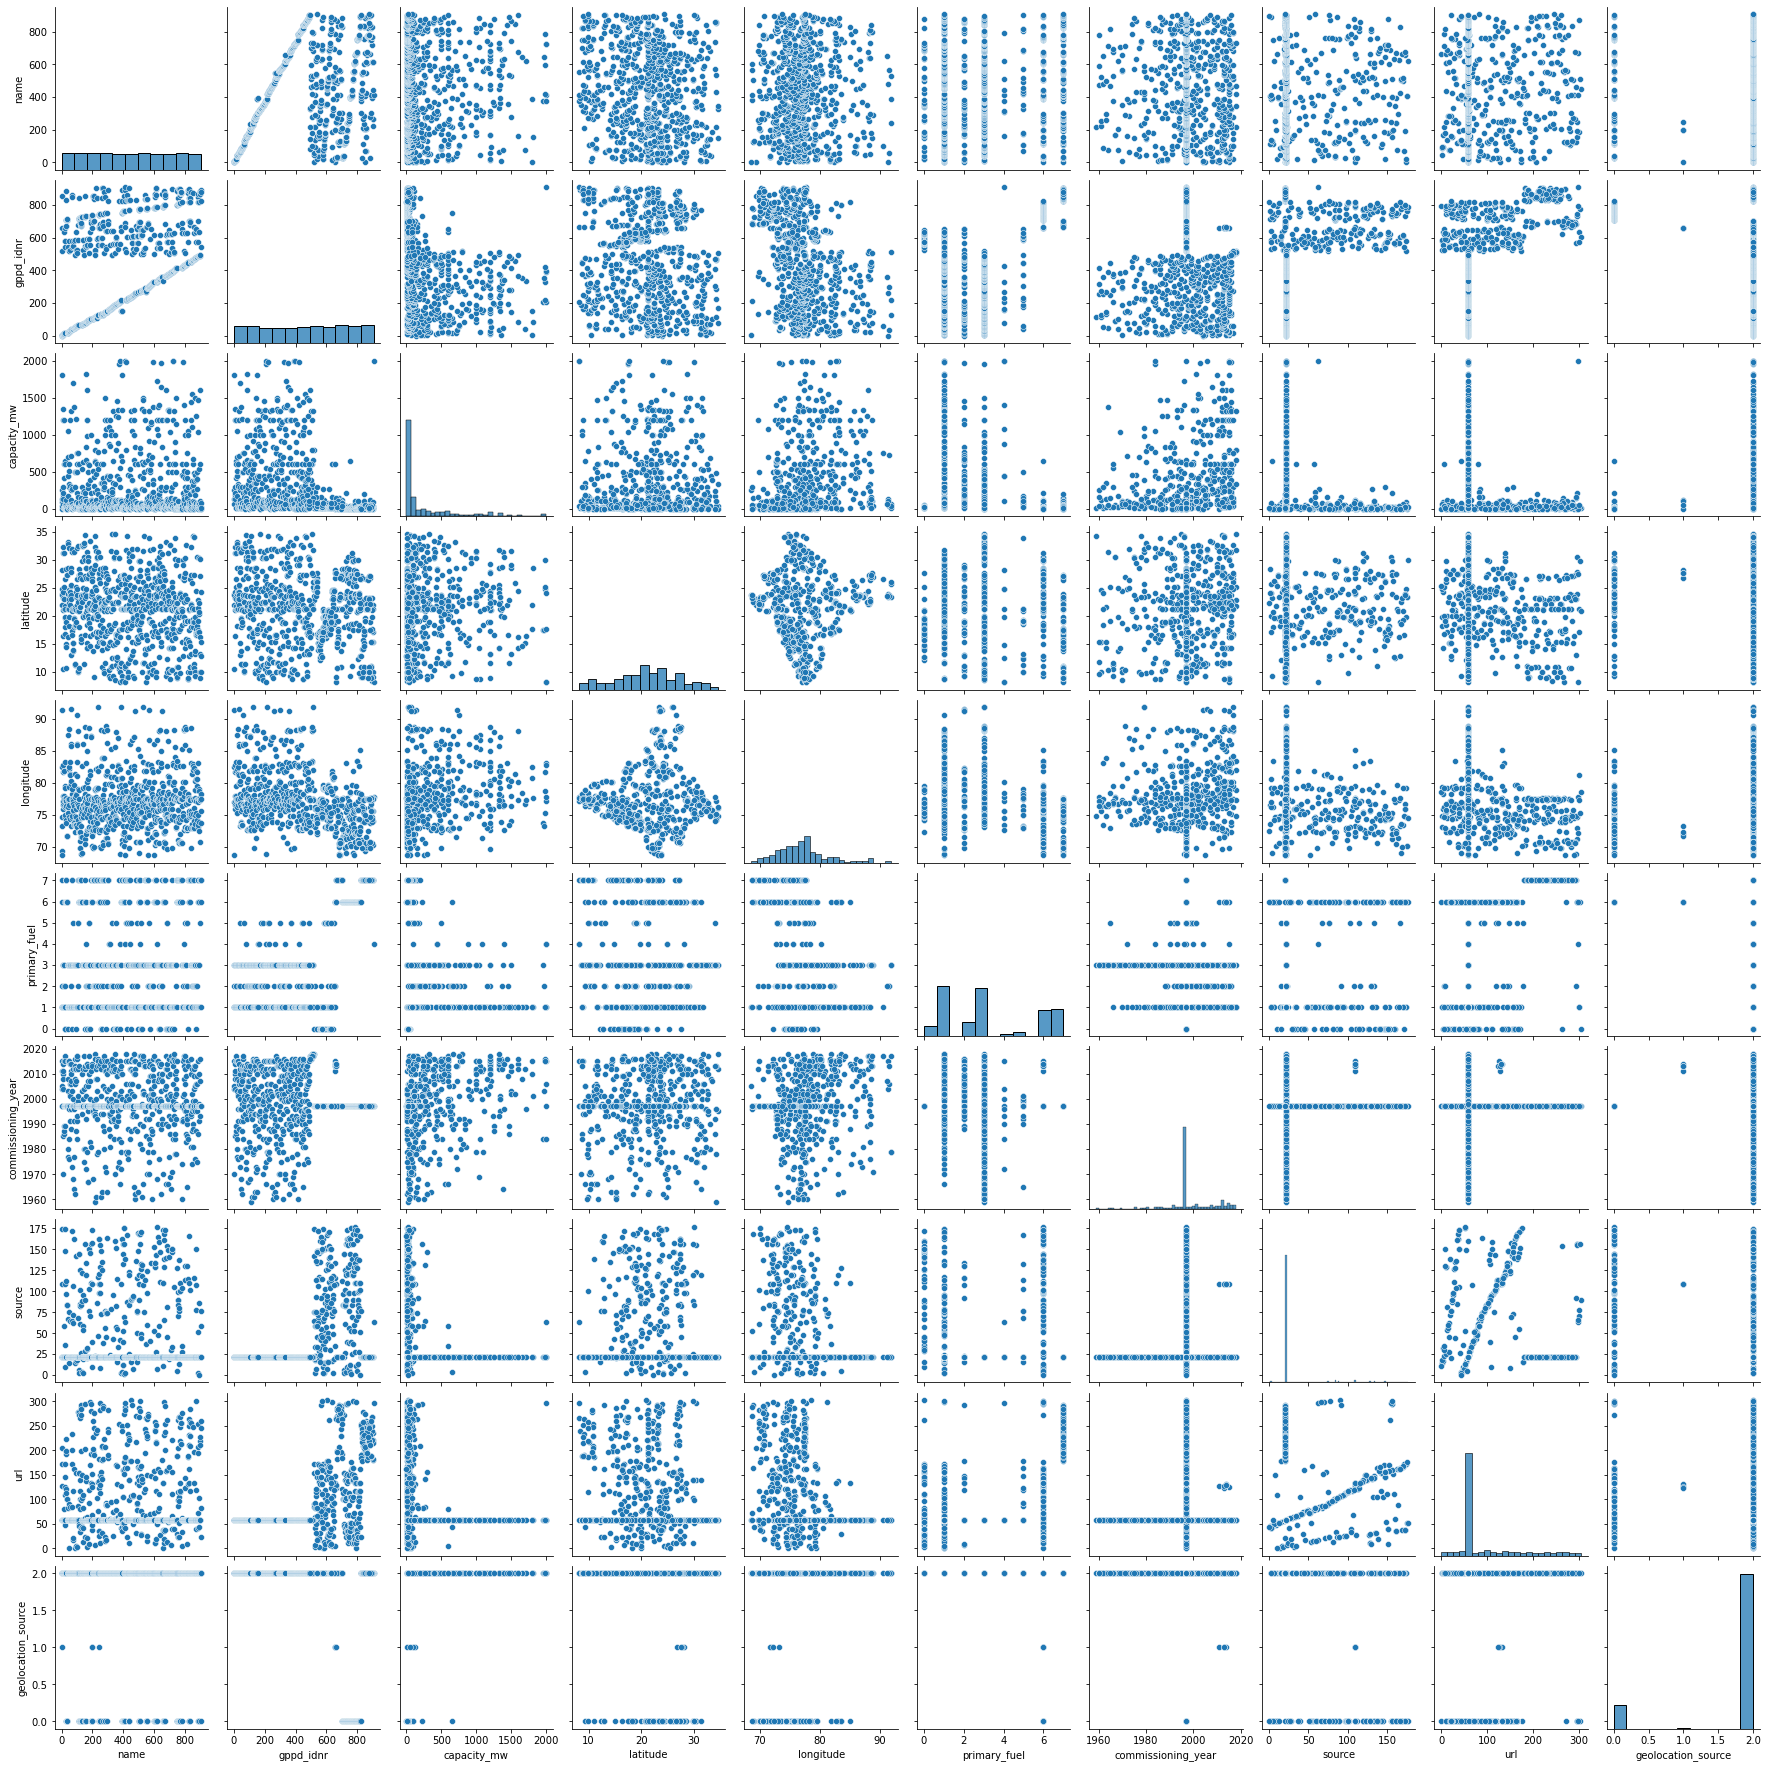

In [187]:
sns.pairplot(df)

In [78]:
# Now Lets Check for Outliers

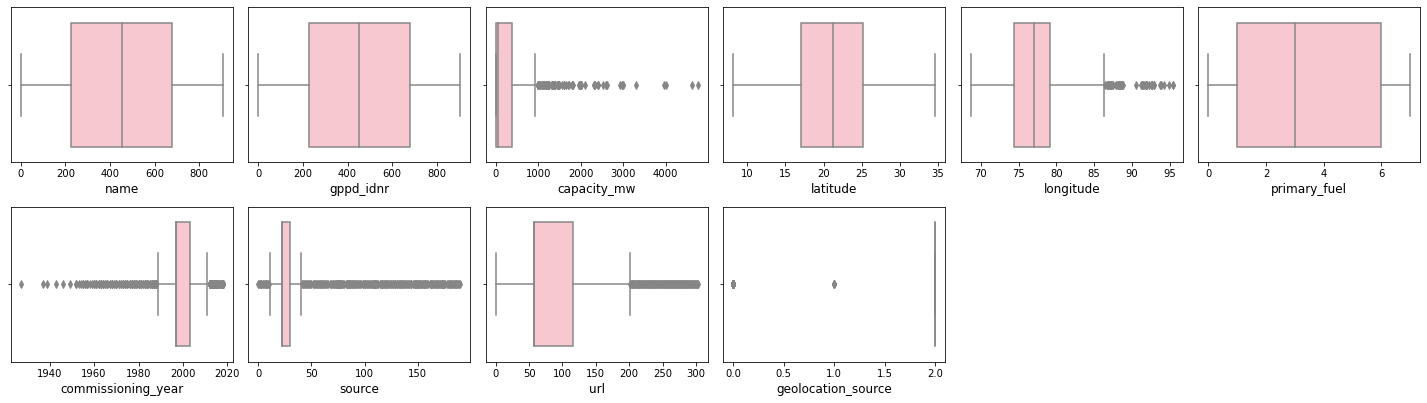

In [80]:
plt.figure(figsize=(20,8),facecolor="White")
plotnumber=1
for i in df.columns:
    if plotnumber<=12:
        ax=plt.subplot(3,6,plotnumber)
        sns.boxplot(df[i],color='pink')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [81]:
# There are Outliers present in our DataSet

In [82]:
# Now Quantify outliers and remove them

In [83]:
from scipy.stats import zscore

In [84]:
z=np.abs(zscore(df))

In [85]:
np.where(z>3)

(array([ 15,  71,  80, 143, 147, 179, 183, 191, 209, 222, 244, 299, 308,
        321, 323, 333, 340, 342, 345, 360, 363, 364, 371, 375, 416, 427,
        444, 454, 478, 482, 484, 493, 494, 499, 519, 538, 541, 546, 573,
        577, 583, 592, 601, 621, 638, 648, 657, 661, 669, 689, 695, 706,
        709, 726, 728, 767, 786, 788, 807, 808, 818, 832, 847, 848, 870,
        871, 879, 880, 895, 900], dtype=int64),
 array([2, 7, 7, 2, 2, 4, 4, 7, 2, 6, 4, 7, 2, 7, 4, 4, 4, 6, 7, 4, 2, 2,
        6, 2, 4, 4, 6, 6, 6, 2, 6, 2, 2, 4, 4, 6, 6, 4, 6, 4, 6, 6, 6, 6,
        4, 2, 2, 7, 7, 7, 2, 6, 6, 2, 6, 2, 2, 2, 6, 2, 4, 7, 4, 6, 7, 7,
        7, 2, 7, 7], dtype=int64))

In [86]:
df=df[(z<3).all(axis=1)]

In [87]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
0,0,657,2.5,28.1839,73.2407,6,2011.000000,109,128,1
1,1,519,98.0,24.7663,74.6090,1,1997.091082,174,173,2
2,2,853,39.2,21.9038,69.3732,7,1997.091082,21,205,2
3,3,0,135.0,23.8712,91.3602,2,2004.000000,22,58,2
4,4,1,1800.0,21.9603,82.4091,1,2015.000000,22,58,2
...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2016.000000,22,58,2
903,903,822,3.0,12.8932,78.1654,6,1997.091082,77,22,0
904,904,891,25.5,15.2758,75.5811,7,1997.091082,21,260,2
905,905,539,80.0,24.3500,73.7477,1,1997.091082,59,82,2


In [88]:
# Now lets Check For Data Loss percentage

In [89]:
loss_percentage=(907-837)/907*100

In [90]:
loss_percentage

7.717750826901875

In [91]:
# So only 7.7 percent Data is lost

In [92]:
x1=df.iloc[:,[0,1,2,3,4,6,7,8,9]]

In [93]:
x1.shape

(837, 9)

In [94]:
y1=df.iloc[:,5]

In [95]:
y1.shape

(837,)

In [96]:
# Since Data Is imbalanced So Applying SMOTE balancing Technique

In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
smt=SMOTE()

In [99]:
x1,y1=smt.fit_resample(x1,y1)

In [100]:
x1.shape

(1872, 9)

In [101]:
y1.shape

(1872,)

In [102]:
# Now Lets Remove skewness

In [103]:
x1.skew()

name                  0.090919
gppd_idnr            -0.082349
capacity_mw           2.057390
latitude              0.060634
longitude             1.253846
commissioning_year   -0.899726
source                1.397542
url                   1.371483
geolocation_source   -2.322305
dtype: float64

In [104]:
from sklearn.preprocessing import power_transform

In [105]:
x1_new=power_transform(x1)

In [106]:
pd.DataFrame(x1_new,columns=x1.columns).skew().sort_values(ascending=False)

commissioning_year    0.105529
url                   0.034272
capacity_mw           0.022105
latitude             -0.036684
longitude            -0.044718
source               -0.135807
name                 -0.209645
gppd_idnr            -0.278073
geolocation_source   -2.299788
dtype: float64

In [107]:
# Since Geolocation source is object dtype so its skewness cannot be removed

In [108]:
x1=pd.DataFrame(x1_new,columns=x1.columns)

In [109]:
x1

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,source,url,geolocation_source
0,-2.317928,0.761778,-1.819271,1.440889,-0.914898,1.728042,1.453076,0.722472,-2.530015
1,-2.298832,0.264476,0.196207,0.850832,-0.398255,-0.129290,1.898189,1.207025,0.374251
2,-2.282314,1.428954,-0.321504,0.347639,-2.775081,-0.129290,-0.619686,1.486888,0.374251
3,-2.267274,-2.214470,0.374292,0.694421,2.818987,0.736640,-0.549147,-0.477511,0.374251
4,-2.253246,-2.200255,1.743616,0.357658,1.624910,2.351601,-0.549147,-0.477511,0.374251
...,...,...,...,...,...,...,...,...,...
1867,-0.956505,1.395832,-1.244974,-0.965788,-0.276144,-0.129290,-0.619686,1.581816,0.374251
1868,0.055263,1.345982,-0.222639,0.176382,-2.139331,-0.129290,-0.619686,1.657398,0.374251
1869,-0.961401,1.428954,-1.043830,0.316970,-2.340868,-0.129290,-0.619686,1.874098,0.374251
1870,-0.512195,0.866572,-0.131226,0.529728,-2.195004,-0.129290,-0.619686,1.939031,0.374251


# Proceding further towards model where Target is Primary Fuel

In [110]:
# Checking Multi collinearity

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
def cal_vif(x1):
    vif=pd.DataFrame()
    vif['Variable']=x1.columns
    vif['VIF']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    return vif

In [113]:
cal_vif(x1)

,Variable,VIF
0,name,1.332862
1,gppd_idnr,2.985055
2,capacity_mw,1.999342
3,latitude,1.167749
4,longitude,1.265134
5,commissioning_year,1.106931
6,source,1.269977
7,url,1.526610
8,geolocation_source,1.699398


In [114]:
# So it is clear that our columns does not suffer from multi collinearity

In [115]:
# Now Applying Scaling on dataset

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
ss=StandardScaler()
x1=ss.fit_transform(x1)

In [118]:
x1

array([[-2.31792796,  0.76177805, -1.81927089, ...,  1.4530762 ,
         0.72247207, -2.53001533],
       [-2.29883194,  0.26447556,  0.19620662, ...,  1.89818852,
         1.20702538,  0.374251  ],
       [-2.28231358,  1.42895351, -0.32150425, ..., -0.61968581,
         1.48688827,  0.374251  ],
       ...,
       [-0.96140113,  1.42895351, -1.04383037, ..., -0.61968581,
         1.87409843,  0.374251  ],
       [-0.51219487,  0.86657178, -0.13122576, ..., -0.61968581,
         1.9390311 ,  0.374251  ],
       [-0.14678124,  1.3326535 , -1.02237798, ..., -0.61968581,
         1.84078192,  0.374251  ]])

In [119]:
# Moving towards our first model which is KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,f1_score,roc_curve

In [121]:
knn=KNeighborsClassifier()

In [122]:
for i in range(0,100):
    x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    knn.fit(x1train,y1train)
    predknn=knn.predict(x1test)
    knnacc=accuracy_score(y1test,predknn)
    print('At RandomState ',i,' Accuracy is ',knnacc*100)

At RandomState  0  Accuracy is  82.93333333333334
At RandomState  1  Accuracy is  86.66666666666667
At RandomState  2  Accuracy is  81.6
At RandomState  3  Accuracy is  85.33333333333334
At RandomState  4  Accuracy is  84.0
At RandomState  5  Accuracy is  82.13333333333334
At RandomState  6  Accuracy is  87.46666666666667
At RandomState  7  Accuracy is  87.2
At RandomState  8  Accuracy is  82.39999999999999
At RandomState  9  Accuracy is  81.33333333333333
At RandomState  10  Accuracy is  86.93333333333332
At RandomState  11  Accuracy is  82.66666666666667
At RandomState  12  Accuracy is  83.2
At RandomState  13  Accuracy is  85.86666666666667
At RandomState  14  Accuracy is  82.93333333333334
At RandomState  15  Accuracy is  82.93333333333334
At RandomState  16  Accuracy is  88.53333333333333
At RandomState  17  Accuracy is  82.93333333333334
At RandomState  18  Accuracy is  85.86666666666667
At RandomState  19  Accuracy is  88.0
At RandomState  20  Accuracy is  85.6
At RandomState  2

In [123]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=80)
knn.fit(x1train,y1train)
predknn=knn.predict(x1test)
knnacc=accuracy_score(y1test,predknn)
print('At RandomState 80 Accuracy is ',knnacc*100)

At RandomState 80 Accuracy is  89.06666666666668


In [128]:
print('Confusion matrix \n',confusion_matrix(y1test,predknn))
print('classification_report \n',classification_report(y1test,predknn))

Confusion matrix 
 [[45  0  0  0  0  0  0  0]
 [ 4 32  6  3  2  1  0  0]
 [ 0  3 35  0  2  7  0  0]
 [ 0  6  1 29  1  4  0  0]
 [ 0  0  0  0 52  0  0  0]
 [ 0  0  1  0  0 53  0  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0  0 43]]
classification_report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        45
           1       0.78      0.67      0.72        48
           2       0.81      0.74      0.78        47
           3       0.91      0.71      0.79        41
           4       0.91      1.00      0.95        52
           5       0.82      0.98      0.89        54
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        43

    accuracy                           0.89       375
   macro avg       0.89      0.89      0.89       375
weighted avg       0.89      0.89      0.89       375



In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
# Now Checking best CV

In [131]:
for i in range(2,10):
    cvknn=cross_val_score(knn,x1,y1,cv=i)
    cvknn_mean=cvknn.mean()
    print('At cv ',i,' cross_val_score is ',cvknn_mean*100,' with accuracy ',knnacc*100)

At cv  2  cross_val_score is  75.48076923076923  with accuracy  89.06666666666668
At cv  3  cross_val_score is  78.79273504273505  with accuracy  89.06666666666668
At cv  4  cross_val_score is  80.23504273504274  with accuracy  89.06666666666668
At cv  5  cross_val_score is  81.73333333333333  with accuracy  89.06666666666668
At cv  6  cross_val_score is  82.53205128205127  with accuracy  89.06666666666668
At cv  7  cross_val_score is  83.44074171677727  with accuracy  89.06666666666668
At cv  8  cross_val_score is  83.22649572649571  with accuracy  89.06666666666668
At cv  9  cross_val_score is  83.60042735042735  with accuracy  89.06666666666668


In [132]:
# Best CV is at 9

In [133]:
cvknn=cross_val_score(knn,x1,y1,cv=9)
cvknn_mean=cvknn.mean()
print('At cv 9 cross_val_score is ',cvknn_mean*100,' with accuracy ',knnacc*100)

At cv 9 cross_val_score is  83.60042735042735  with accuracy  89.06666666666668


In [616]:
# Now Using 2nd model which is SVC

#  We Cannot Plot The ROC Curve Because It in Not a Binary Classification Problem

In [136]:
# 2nd Model

In [137]:
from sklearn.svm import SVC

In [138]:
svc=SVC()

In [139]:
# Finding Best parameter using gridsearchCV

In [140]:
parameter={'kernel':['rbf','poly','linear']}
gscv=GridSearchCV(svc,parameter)
gscv.fit(x1train,y1train)
print(gscv.best_params_)

{'kernel': 'rbf'}


In [141]:
svc=SVC(kernel='rbf')

In [142]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=80)
svc.fit(x1train,y1train)
predsvc=svc.predict(x1test)
svcacc=accuracy_score(y1test,predsvc)
print('At Random State 80 Accuracy is ',svcacc*100)

At Random State 80 Accuracy is  87.46666666666667


In [143]:
print('Confussion Matrix \n',confusion_matrix(y1test,predsvc))
print('classification report\n',classification_report(y1test,predsvc))

Confussion Matrix 
 [[45  0  0  0  0  0  0  0]
 [ 3 34  3  4  3  1  0  0]
 [ 0  4 28  5  3  7  0  0]
 [ 0  5  0 33  1  2  0  0]
 [ 0  0  0  0 52  0  0  0]
 [ 0  5  1  0  0 48  0  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0  0 43]]
classification report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       0.71      0.71      0.71        48
           2       0.88      0.60      0.71        47
           3       0.79      0.80      0.80        41
           4       0.88      1.00      0.94        52
           5       0.83      0.89      0.86        54
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        43

    accuracy                           0.87       375
   macro avg       0.88      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [145]:
# Now Checking it with CV 

In [146]:
cvsvc=cross_val_score(svc,x1,y1,cv=9)
cvsvc_mean=cvsvc.mean()
print('At CV 9 Cross Val Score is ',cvsvc_mean*100,' with SVC accuracy ',svcacc*100)

At CV 9 Cross Val Score is  84.08119658119658  with SVC accuracy  87.46666666666667


In [147]:
# Now Using 3rd model DecisionTreeClassifier

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dtc=DecisionTreeClassifier()

In [150]:
# Finding Best Parameter using GridsearchCV

In [151]:
parameter={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','auto','log2']}
gscv=GridSearchCV(dtc,parameter)
gscv.fit(x1train,y1train)
print(gscv.best_params_)

{'criterion': 'gini', 'max_features': 'auto'}


In [152]:
dtc=DecisionTreeClassifier(criterion='gini',max_features='auto')
dtc.fit(x1train,y1train)
preddtc=dtc.predict(x1test)
dtcacc=accuracy_score(y1test,preddtc)
print('Accuracy Score is ',dtcacc*100)
print('Confusion Matrix\n',confusion_matrix(y1test,preddtc))
print('Classification report\n',classification_report(y1test,preddtc))

Accuracy Score is  83.2
Confusion Matrix
 [[39  6  0  0  0  0  0  0]
 [ 1 28  7  8  2  2  0  0]
 [ 0  0 35  5  2  5  0  0]
 [ 0  4  6 30  1  0  0  0]
 [ 0  1  3  2 46  0  0  0]
 [ 1  4  0  3  0 46  0  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0  0 43]]
Classification report
               precision    recall  f1-score   support

           0       0.95      0.87      0.91        45
           1       0.65      0.58      0.62        48
           2       0.69      0.74      0.71        47
           3       0.62      0.73      0.67        41
           4       0.90      0.88      0.89        52
           5       0.87      0.85      0.86        54
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        43

    accuracy                           0.83       375
   macro avg       0.84      0.83      0.83       375
weighted avg       0.84      0.83      0.83       375



In [633]:
# Now checking it with CV

In [153]:
cvdtc=cross_val_score(dtc,x1,y1,cv=9)
cvdtc_mean=cvdtc.mean()
print('At CV 9 Cross Val Score is ',cvdtc_mean*100,' with accuracy ',dtcacc*100)

At CV 9 Cross Val Score is  82.05128205128204  with accuracy  83.2


In [154]:
# Using 4th model RandomForestClassifier

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rfc=RandomForestClassifier()

In [157]:
# Finding Best paramters using GridSearchCV

In [158]:
parameter={'criterion':['gini','entropy','log_loss'],'max_features':['auto','sqrt','None']}
gscv=GridSearchCV(rfc,parameter)
gscv.fit(x1train,y1train)
print(gscv.best_params_)

{'criterion': 'gini', 'max_features': 'auto'}


In [159]:
rfc=RandomForestClassifier(criterion='gini',max_features='auto')
rfc.fit(x1train,y1train)
predrfc=rfc.predict(x1test)
rfcacc=accuracy_score(y1test,predrfc)
print('Accuracy Score is ',rfcacc*100)
print('Confusion matrix\n',confusion_matrix(y1test,predrfc))
print('classification report\n',classification_report(y1test,predrfc))

Accuracy Score is  92.26666666666667
Confusion matrix
 [[44  1  0  0  0  0  0  0]
 [ 1 38  2  5  1  1  0  0]
 [ 0  3 37  2  3  2  0  0]
 [ 0  3  1 35  1  1  0  0]
 [ 0  0  0  1 51  0  0  0]
 [ 0  1  0  0  0 53  0  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0  0 43]]
classification report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.83      0.79      0.81        48
           2       0.93      0.79      0.85        47
           3       0.81      0.85      0.83        41
           4       0.91      0.98      0.94        52
           5       0.93      0.98      0.95        54
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        43

    accuracy                           0.92       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375



In [641]:
# Now checking it with  CV 

In [160]:
cvrfc=cross_val_score(rfc,x1,y1,cv=9)
cvrfc_mean=cvrfc.mean()
print('At CV 9 Cross Val Score is ',cvrfc_mean*100,' With RandomForest Accuracy ',rfcacc*100)

At CV 9 Cross Val Score is  90.11752136752136  With RandomForest Accuracy  92.26666666666667


In [161]:
# So Best Model For Classification is Decision Tree Classifier since it has least difference between CV and Accuracy.

# Proceding Towards Model for where Target is capacity_mw

In [385]:
x2=df.iloc[:,[0,1,3,4,5,6,7,8,9]]

In [386]:
x2

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
0,0,657,28.1839,73.2407,6,2011.000000,109,128,1
1,1,519,24.7663,74.6090,1,1997.091082,174,173,2
2,2,853,21.9038,69.3732,7,1997.091082,21,205,2
3,3,0,23.8712,91.3602,2,2004.000000,22,58,2
4,4,1,21.9603,82.4091,1,2015.000000,22,58,2
...,...,...,...,...,...,...,...,...,...
902,902,491,16.2949,77.3568,1,2016.000000,22,58,2
903,903,822,12.8932,78.1654,6,1997.091082,77,22,0
904,904,891,15.2758,75.5811,7,1997.091082,21,260,2
905,905,539,24.3500,73.7477,1,1997.091082,59,82,2


In [387]:
x2.shape

(837, 9)

In [388]:
y2=df.iloc[:,2]

In [389]:
y2

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 837, dtype: float64

In [390]:
y2.shape

(837,)

In [1]:
# Using Feature selection method to check which features are contributing how much to the target variable

In [391]:
from sklearn.feature_selection import mutual_info_regression

In [392]:
ordered_rank_features=mutual_info_regression(x2,y2)

In [393]:
ordered_rank_features

array([0.09873402, 0.35898405, 0.15228058, 0.1960809 , 0.63429719,
       0.28957764, 0.42583137, 0.38096475, 0.19518409])

In [394]:
ordered_rank_features=pd.Series(ordered_rank_features)
ordered_rank_features.index=x2.columns
ordered_rank_features.sort_values(ascending=False)

primary_fuel          0.634297
source                0.425831
url                   0.380965
gppd_idnr             0.358984
commissioning_year    0.289578
longitude             0.196081
geolocation_source    0.195184
latitude              0.152281
name                  0.098734
dtype: float64

<AxesSubplot:>

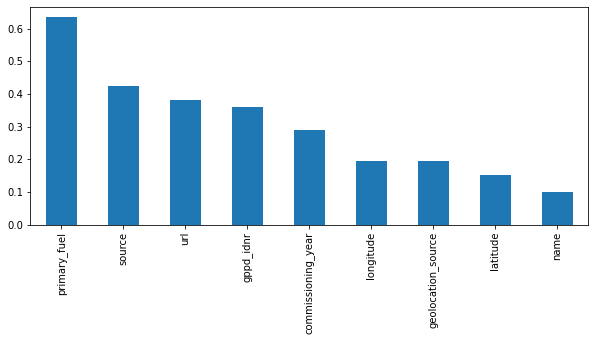

In [395]:
ordered_rank_features.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [396]:
# This show Which feature is import as per our target varialble

In [397]:
from sklearn.feature_selection import SelectPercentile

In [398]:
# Selecting Top 90 percentile

In [399]:
top_columns=SelectPercentile(mutual_info_regression,percentile=90)
top_columns.fit(x2,y2)
x2.columns[top_columns.get_support()]

Index(['gppd_idnr', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'url', 'geolocation_source'],
      dtype='object')

In [335]:
# Now Dropping the columns which are not relevant

In [400]:
x2.drop(['name'],axis=1,inplace=True)

In [401]:
x2.skew()

gppd_idnr            -0.048629
latitude             -0.112961
longitude             0.902538
primary_fuel          0.417885
commissioning_year   -0.841353
source                1.790332
url                   1.437903
geolocation_source   -2.110249
dtype: float64

In [402]:
from sklearn.preprocessing import power_transform

In [403]:
x2_new=power_transform(x2)

In [404]:
pd.DataFrame(x2_new,columns=x2.columns).skew().sort_values(ascending=False)

url                   0.064581
commissioning_year    0.027326
longitude             0.000159
primary_fuel         -0.055927
latitude             -0.071294
source               -0.181446
gppd_idnr            -0.313817
geolocation_source   -2.082067
dtype: float64

In [405]:
x2=pd.DataFrame(x2_new,columns=x2.columns)

In [406]:
# Now Checking for multicollinearity

In [407]:
def cal_vif(x2):
    vif=pd.DataFrame()
    vif['Variable']=x2.columns
    vif['VIF']=[variance_inflation_factor(x2.values,i)for i in range(x2.shape[1])]
    return vif

In [408]:
cal_vif(x2)

,Variable,VIF
0,gppd_idnr,1.874447
1,latitude,1.119315
2,longitude,1.327972
3,primary_fuel,2.338272
4,commissioning_year,1.109874
5,source,1.543433
6,url,1.863336
7,geolocation_source,2.259626


In [409]:
# There is no multicollinearity

In [410]:
# Now Applying StandardScaling

In [411]:
x2=ss.fit_transform(x2)

In [412]:
# Moving Ahead with 1st model Linear Rigression

In [413]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [414]:
lr=LinearRegression()
for i in range(0,100):
    x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=i)
    lr.fit(x2train,y2train)
    predlr=lr.predict(x2test)
    lracc=r2_score(y2test,predlr)
    print('At Random state ',i,' Acuuracy is ',lracc*100)

At Random state  0  Acuuracy is  25.5052825561885
At Random state  1  Acuuracy is  35.969957083210915
At Random state  2  Acuuracy is  29.22573270488019
At Random state  3  Acuuracy is  33.04054595791467
At Random state  4  Acuuracy is  29.496917988800554
At Random state  5  Acuuracy is  28.886315797028228
At Random state  6  Acuuracy is  38.30388422373529
At Random state  7  Acuuracy is  23.26690250488481
At Random state  8  Acuuracy is  26.315977215428465
At Random state  9  Acuuracy is  22.962764514406853
At Random state  10  Acuuracy is  32.55656949247808
At Random state  11  Acuuracy is  36.8025101627823
At Random state  12  Acuuracy is  21.135585683640222
At Random state  13  Acuuracy is  29.23799205680746
At Random state  14  Acuuracy is  35.72556239490616
At Random state  15  Acuuracy is  30.605554085282417
At Random state  16  Acuuracy is  31.12343704064071
At Random state  17  Acuuracy is  32.5086196041658
At Random state  18  Acuuracy is  14.757979784046038
At Random state  

In [415]:
x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=87)
lr.fit(x2train,y2train)
predlr=lr.predict(x2test)
lracc=r2_score(y2test,predlr)
print('At Random state 97 Acuuracy is ',lracc*100)
print('mean squared error',mean_squared_error(y2test,predlr))
print('mean absolute error',mean_absolute_error(y2test,predlr))

At Random state 97 Acuuracy is  40.67792499143906
mean squared error 119876.37244255435
mean absolute error 229.23108038656358


In [416]:
# Now Checking CV

In [417]:
for i in range(2,10):
    cvlr=cross_val_score(lr,x2,y2,cv=i)
    cvlr_mean=cvlr.mean()
    print('At CV ',i,' Cross Val Score is ',cvlr_mean*100,' with accuracy ',lracc*100)

At CV  2  Cross Val Score is  12.771023532077642  with accuracy  40.67792499143906
At CV  3  Cross Val Score is  19.75343036334859  with accuracy  40.67792499143906
At CV  4  Cross Val Score is  24.473944464617094  with accuracy  40.67792499143906
At CV  5  Cross Val Score is  26.58633141849997  with accuracy  40.67792499143906
At CV  6  Cross Val Score is  26.76831819323074  with accuracy  40.67792499143906
At CV  7  Cross Val Score is  26.245228555170875  with accuracy  40.67792499143906
At CV  8  Cross Val Score is  27.520073145887373  with accuracy  40.67792499143906
At CV  9  Cross Val Score is  27.943317946227943  with accuracy  40.67792499143906


In [418]:
cvlr=cross_val_score(lr,x2,y2,cv=9)
cvlr_mean=cvlr.mean()
print('At CV 9 Cross Val Score is ',cvlr_mean*100,' with accuracy ',lracc*100)

At CV 9 Cross Val Score is  27.943317946227943  with accuracy  40.67792499143906


In [419]:
# Now Moving Towards 2nd model Lasso

In [420]:
from sklearn.linear_model import Lasso

In [421]:
ls=Lasso()

In [422]:
# Finding Best parameters using gridseachCV

In [423]:
parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
gscvls=GridSearchCV(ls,parameter)
gscvls.fit(x2train,y2train)
print(gscvls.best_params_)

{'alpha': 10, 'random_state': 0}


In [424]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x2train,y2train)
predls=ls.predict(x2test)
lsacc=r2_score(y2test,predls)
print('mse ',mean_squared_error(y2test,predls))
print('mae ',mean_absolute_error(y2test,predls) )

mse  123985.19409395575
mae  234.76515918096888


In [425]:
# Now Finding Best CV

In [426]:
cvls=cross_val_score(ls,x2,y2,cv=9)
cvls_mean=cvls.mean()
print('At CV 9 Cross_val_score is ',cvls_mean*100,' with Lasso accuracy ',lsacc*100)

At CV 9 Cross_val_score is  28.367044344217195  with Lasso accuracy  38.644631680715655


In [427]:
# Using 3rd model Ridge

In [428]:
from sklearn.linear_model import Ridge

In [429]:
# Finding Best Parameter using Grid SearchCV

In [430]:
rg=Ridge()
parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
gscvrg=GridSearchCV(rg,parameter)
gscvrg.fit(x2train,y2train)
print(gscvrg.best_params_)

{'alpha': 10, 'random_state': 0}


In [431]:
rg=Ridge(alpha=10,random_state=0)
rg.fit(x2train,y2train)
predrg=rg.predict(x2test)
rgacc=r2_score(y2test,predrg)

In [695]:
# Checking it with CV

In [432]:
cvrg=cross_val_score(rg,x2,y2,cv=9)
cvrg_mean=cvrg.mean()
print('At CV 9 cross val score is ',cvrg_mean*100,' with Ridge Accuracy ',rgacc*100)

At CV 9 cross val score is  28.079170280192212  with Ridge Accuracy  40.46369713368348


In [433]:
# Using 4th Model RandomForestRegressor

In [434]:
from sklearn.ensemble import RandomForestRegressor

In [435]:
rf=RandomForestRegressor()

In [436]:
# Finding Best Parameters Using GridSearchCV

In [437]:
parameter={'criterion':['squared_error','absolute_error','poisson'],'max_features':['auto','sqrt','log2']}
gscvrf=GridSearchCV(rf,parameter)
gscvrf.fit(x2train,y2train)
print(gscvrf.best_params_)

{'criterion': 'squared_error', 'max_features': 'sqrt'}


In [438]:
rf=RandomForestRegressor(criterion='squared_error',max_features='sqrt')
rf.fit(x2train,y2train)
predrf=rf.predict(x2test)
rfacc=r2_score(y2test,predrf)

In [439]:
print(rfacc*100)

58.61601057416996


In [440]:
# Checking Best CV

In [441]:
cvrf=cross_val_score(rf,x2,y2,cv=9)
cvrf_mean=cvrf.mean()
print('At cv 9 Cross Val score is ',cvrf_mean*100,' with Random Forest Accuracy ',rfacc*100)

At cv 9 Cross Val score is  49.27890289089197  with Random Forest Accuracy  58.61601057416996


In [442]:
print('mse ',mean_squared_error(y2test,predrf))
print('mae ',mean_absolute_error(y2test,predrf))

mse  83627.59611584053
mae  171.25342559523807


In [443]:
# So Based On above Observation Random Forest Regressor is Best Model because it has highest accuracy with lesser difference with 
# cross val score and also it has lower mean_squared_error and mean absolute error than others

# Saving best models

In [444]:
import pickle

In [445]:
filename1='primaryfuelc.pkl'
pickle.dump(rfc,open(filename1,'wb'))

In [446]:
output1=pickle.load(open('primaryfuelc.pkl','rb'))
result1=output1.score(x1test,y1test)
result1*100

92.26666666666667

In [460]:
model1=pd.DataFrame([output1.predict(x1test)[:],(y1test)[:]],index=['actual','predicted'])
model1

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
actual,5,1,0,2,0,5,6,0,3,3,...,5,5,5,0,4,6,3,0,5,6
predicted,5,1,0,2,0,5,6,0,3,3,...,5,5,5,0,4,6,3,0,5,6


In [448]:
# This is Our Model For prediction of primary Fuel

In [449]:
filename2='capacitymw.pkl'
pickle.dump(rf,open(filename2,'wb'))

In [450]:
output2=pickle.load(open('capacitymw.pkl','rb'))
result2=output2.score(x2test,y2test)
result2*100

58.61601057416996

In [459]:
model2=pd.DataFrame([output2.predict(x2test)[:],(y2test)[:]],index=['actual','predicted'])
model2

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
actual,25.165,411.39972,353.64,884.67,8.944,508.09354,124.8395,242.56,36.4105,10.853,...,6.419,147.466,1078.1074,809.38586,7.169,13.1485,671.5,963.2942,10.508,10.6415
predicted,113.600,419.33000,134.00,100.00,15.000,655.00000,30.0000,20.00,100.0000,9.350,...,5.000,35.000,427.5000,1240.00000,5.000,16.5000,1210.0,1980.0000,1.000,21.0000


# The most suitable reason we are getting such low accuracy here in this dataset, that the features present are very less contributing to the target and also number of features are very less

In [783]:
# This Is our Model for predicton of Capacity